In [18]:
library(tidyverse)

Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [19]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [20]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [21]:
# Write your code here
tapply(complete_data$measure, complete_data$site_name, mean)


Site 1   Site 2 
10.84913 12.11935

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [22]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


In [ ]:
### The null hypothesis is that there is no significant difference in the distribution of Site 1 and Site 2 data. The alternative hypothesis is that there is a signficant difference in the distribution of the data between Site 1 and Site 2. 

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

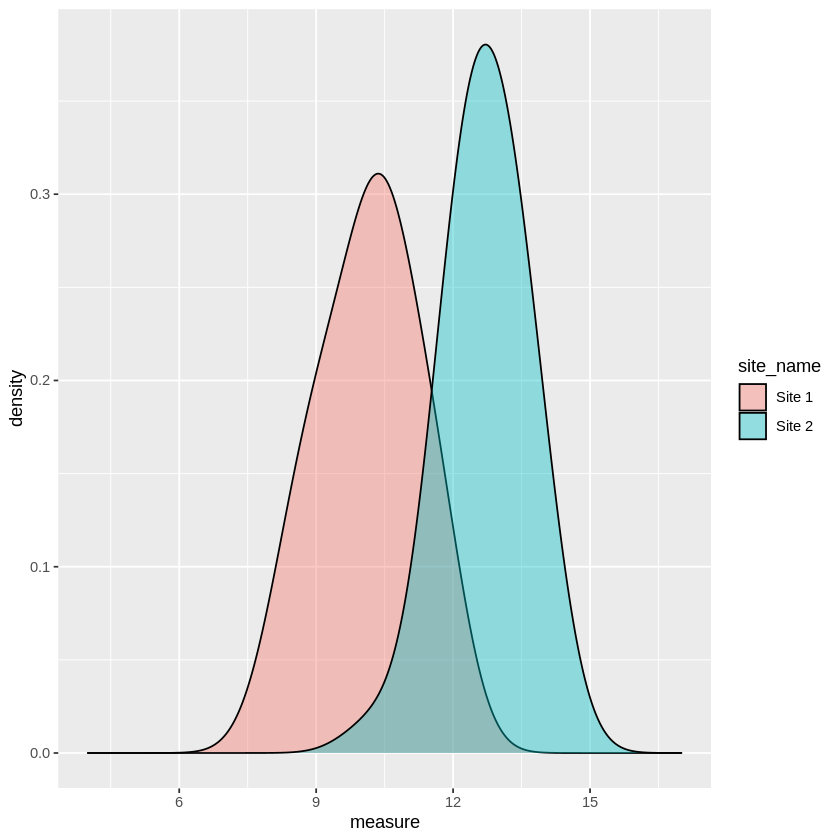

In [11]:
# write your code here
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.65) + 
  xlim(4,17)

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

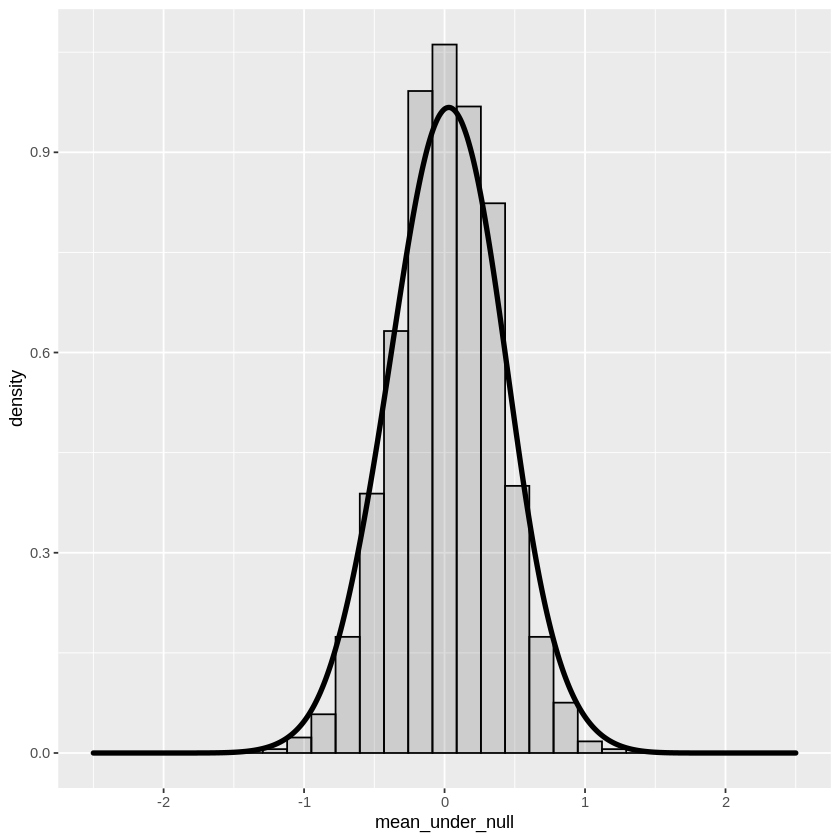

In [25]:
mean_under_null = replicate(1000, processOneIter(data_1$measure, data_2$measure))
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-5.0, 5.0)

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


[1] -2.553808

[1] 0

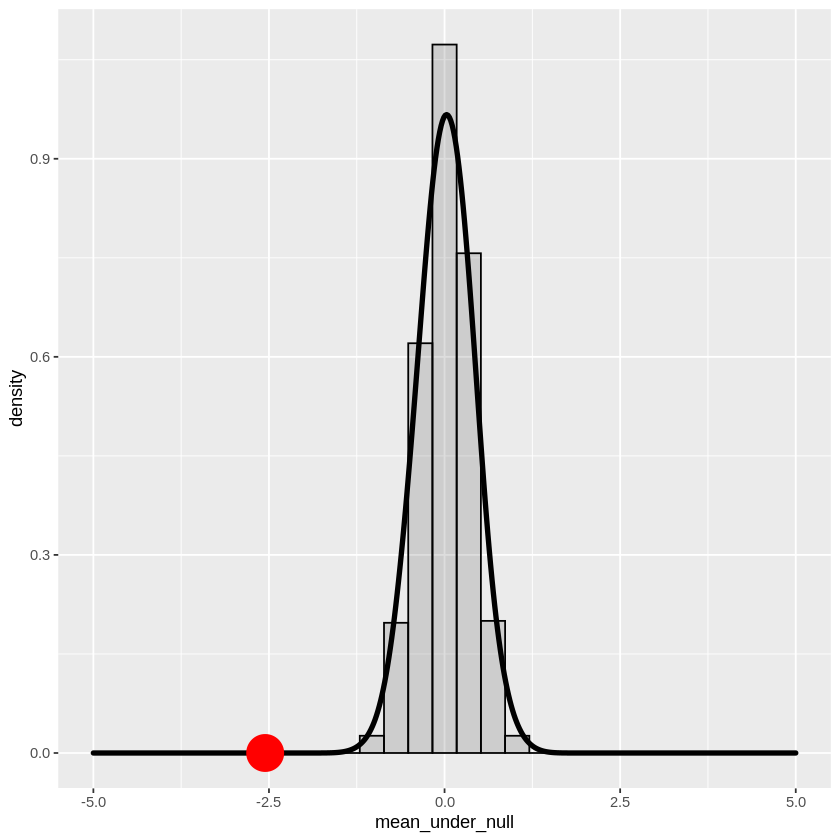

In [44]:
#### Q2.4 compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q
observed_value = mean(data_1$measure) - mean(data_2$measure)
observed_value

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-5.0, 5.0) +
  geom_point(aes(observed_value, 0), color="red", size=10)

  #pvalue

sum(mean_under_null < observed_value) / length(mean_under_null)

#The difference of the mean between the two distributions is far from what the null predicts, meaning our null hypothesis is incorrect and our data supports the alternative hypothesis. The P-value is less than the statistic signficicance level of .05 and therefore we can reject the null hypothesis in favor of the alternative hypothesis. The obs

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [50]:
kind = c('P. lobata', 'M. capitata', 'P. mendrina', 'P. lobata', 'M. capitata', 'P. mendrina')

ratios = c(0.60, 0.19, 0.21, 0.61, 0.19, 0.20)
method = rep(c("X", "Y"), 3)


proportions = tibble(kind, ratios, method)
proportions

kind,ratios,method
<chr>,<dbl>,<chr>
P. lobata,0.60,X
M. capitata,0.19,Y
P. mendrina,0.21,X
P. lobata,0.61,Y
M. capitata,0.19,X
P. mendrina,0.20,Y


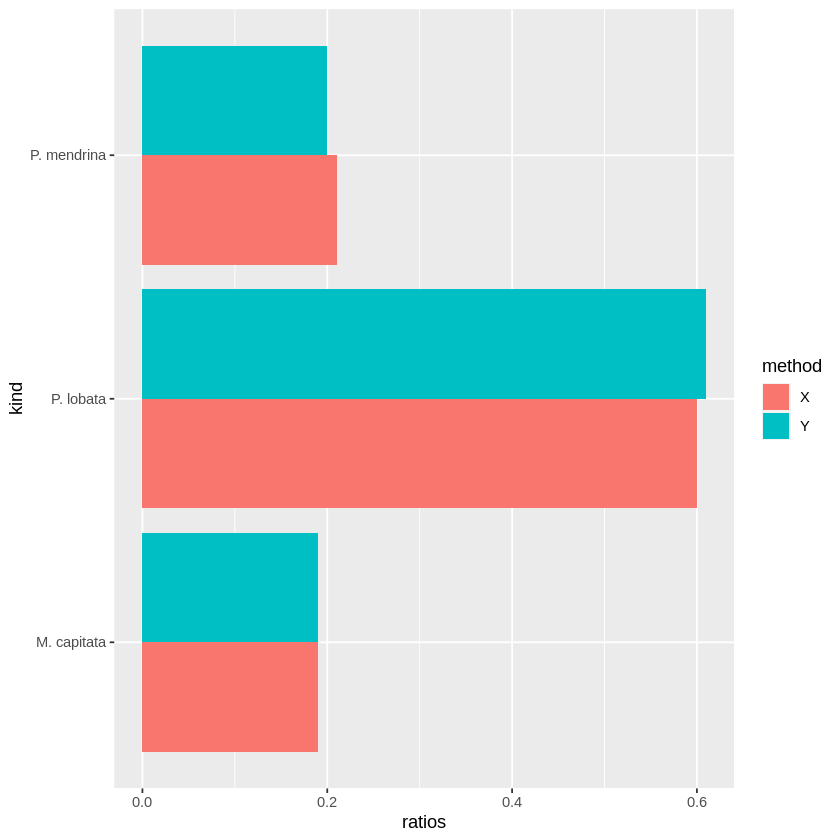

In [51]:
ggplot(proportions, aes(fill=method, y=ratios, x=kind)) + 
    geom_bar(position="dodge", stat="identity") + 
    coord_flip()

In [55]:
#test stat 
subtract_abs = function(x){
    abs(x[1] - x[2])
}


sum(tapply(proportions$ratios, proportions$kind, subtract_abs))/2

[1] 0.01

In [59]:
#Multinomial Distribution
sample(c('P. lobata', 'M. capitata', 'P. mendrina'), 200, replace=TRUE, prob=c(0.60, 0.19, 0.21))
rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))
rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200
sampleOneIteration = function(){
    true_proportions = c(0.60, 0.19, 0.21)
    sample_proportions = rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200
    sample_tvd = sum(abs(true_proportions- sample_proportions))/2
    sample_tvd
        
}
sampleOneIteration()

[1] "P. mendrina" "M. capitata" "P. mendrina" "P. lobata"   "M. capitata"
  [6] "P. lobata"   "P. mendrina" "P. lobata"   "P. lobata"   "M. capitata"
 [11] "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"  
 [16] "M. capitata" "M. capitata" "P. lobata"   "P. lobata"   "P. mendrina"
 [21] "P. lobata"   "M. capitata" "P. lobata"   "P. mendrina" "M. capitata"
 [26] "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"   "P. mendrina"
 [31] "P. mendrina" "P. lobata"   "P. lobata"   "M. capitata" "M. capitata"
 [36] "M. capitata" "M. capitata" "M. capitata" "M. capitata" "P. lobata"  
 [41] "M. capitata" "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"  
 [46] "P. lobata"   "P. lobata"   "M. capitata" "P. lobata"   "P. lobata"  
 [51] "P. lobata"   "P. lobata"   "P. lobata"   "M. capitata" "M. capitata"
 [56] "P. lobata"   "M. capitata" "P. lobata"   "P. mendrina" "P. lobata"  
 [61] "P. lobata"   "P. lobata"   "P. lobata"   "P. mendrina" "P. lobata"  
 [66] "P. lobata"   "M. capitata" "P. lobata"   "M. capitata" "P. lobata"  
 [71] "M. capitata" "P. lobata"   "M. capitata" "P. lobata"   "M. capitata"
 [76] "P. lobata"   "P. lobata"   "M. capitata" "M. capitata" "P. lobata"  
 [81] "P. lobata"   "P. lobata"   "P. mendrina" "P. mendrina" "P. lobata"  
 [86] "P. lobata"   "M. capitata" "P. lobata"   "P. mendrina" "P. lobata"  
 [91] "P. lobata"   "P. lobata"   "M. capitata" "P. lobata"   "M. capitata"
 [96] "M. capitata" "P. lobata"   "M. capitata" "P. lobata"   "P. mendrina"
[101] "P. lobata"   "P. lobata"   "P. lobata"   "M. capitata" "P. mendrina"
[106] "P. lobata"   "P. mendrina" "M. capitata" "M. capitata" "P. lobata"  
[111] "P. lobata"   "P. lobata"   "P. mendrina" "P. lobata"   "P. mendrina"
[116] "P. mendrina" "P. lobata"   "P. lobata"   "P. mendrina" "P. mendrina"
[121] "M. capitata" "P. mendrina" "P. lobata"   "P. lobata"   "M. capitata"
[126] "P. lobata"   "P. mendrina" "M. capitata" "P. lobata"   "M. capitata"
[131] "P. mendrina" "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"  
[136] "P. lobata"   "M. capitata" "M. capitata" "M. capitata" "P. lobata"  
[141] "M. capitata" "P. mendrina" "P. lobata"   "P. mendrina" "P. mendrina"
[146] "M. capitata" "P. lobata"   "P. mendrina" "P. lobata"   "P. mendrina"
[151] "P. lobata"   "P. mendrina" "P. lobata"   "P. mendrina" "P. lobata"  
[156] "P. lobata"   "M. capitata" "P. lobata"   "M. capitata" "P. mendrina"
[161] "P. lobata"   "P. lobata"   "P. mendrina" "M. capitata" "P. lobata"  
[166] "M. capitata" "P. lobata"   "M. capitata" "M. capitata" "M. capitata"
[171] "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"  
[176] "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"  
[181] "P. lobata"   "P. lobata"   "P. lobata"   "P. mendrina" "P. mendrina"
[186] "P. mendrina" "P. lobata"   "P. lobata"   "P. lobata"   "P. mendrina"
[191] "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"   "P. lobata"  
[196] "P. mendrina" "P. mendrina" "P. lobata"   "P. lobata"   "P. lobata"

130
31
39


0.635
0.155
0.210


[1] 0.02

[1] 0.949

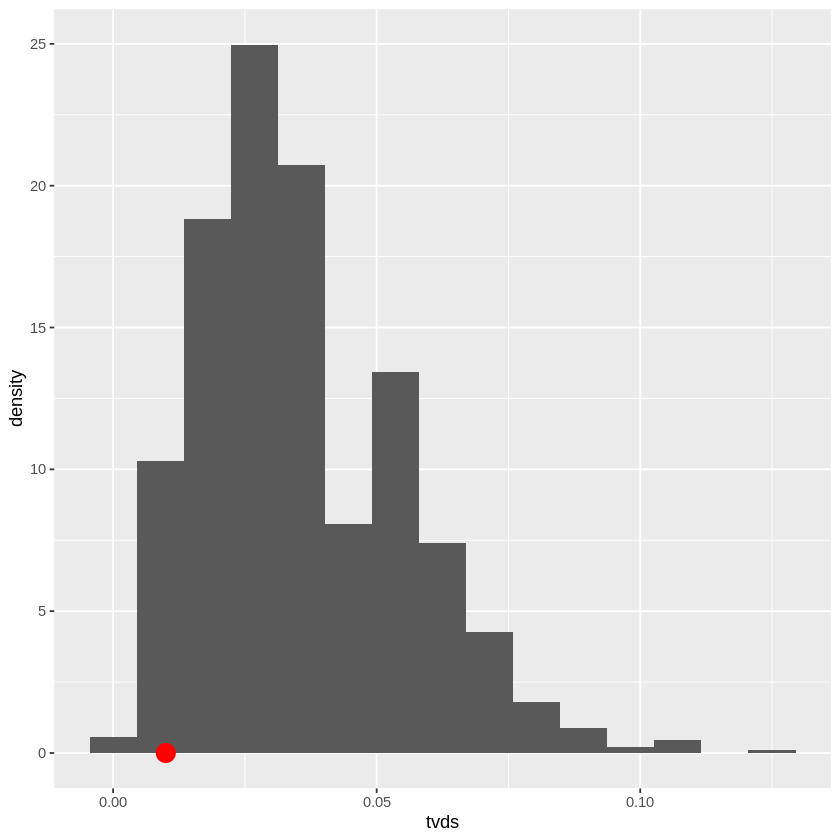

In [63]:
#Hypothesis Test 
tvds = replicate(1000, sampleOneIteration())
observed_stat = sum(tapply(proportions$ratios, proportions$kind, subtract_abs))/2
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")
  p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

In [ ]:
#The proportions obtained at sites X and Y are not statistically different according to our p value which is above the significiant statistic level.